In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import healpy as hp
%matplotlib inline

from pylab import cm

cmap = cm.jet
cmap.set_over(cmap(1.0))
cmap.set_under('w')
cmap.set_bad('gray')

import sys
import os

from urllib.request import urlretrieve,urlopen
from datetime import datetime

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('healpy version ' + hp.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
Numpy version 1.13.3
Pandas version 0.22.0
healpy version 1.11.0
Matplotlib version 2.1.2


In [2]:
df_gh_srz = pd.read_csv('df_tgas_hip_srez.csv',
                     #sep="\s+", 
                     #skiprows=1,
                     #usecols=[1,100],
                     #names=name_col
                    )

In [3]:
df_gh_srz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90283 entries, 0 to 90282
Data columns (total 67 columns):
Unnamed: 0                       90283 non-null int64
hip                              90283 non-null int64
tycho2_id                        0 non-null float64
solution_id                      90283 non-null int64
source_id                        90283 non-null int64
random_index                     90283 non-null int64
ref_epoch                        90283 non-null float64
ra                               90283 non-null float64
ra_error                         90283 non-null float64
dec                              90283 non-null float64
dec_error                        90283 non-null float64
parallax                         90283 non-null float64
parallax_error                   90283 non-null float64
pmra                             90283 non-null float64
pmra_error                       90283 non-null float64
pmdec                            90283 non-null float64
pmdec_err

In [4]:
[[df_gh_srz.ra.max(),df_gh_srz.ra.min()],
[df_gh_srz.l.max(),df_gh_srz.l.min()],
[df_gh_srz.ecl_lon.max(),df_gh_srz.ecl_lon.min()],
[df_gh_srz.dec.max(),df_gh_srz.dec.min()],
[df_gh_srz.b.max(),df_gh_srz.b.min()],
[df_gh_srz.ecl_lat.max(),df_gh_srz.ecl_lat.min()]]

[[179.99997189002639, -179.9952046997528],
 [179.99832093780174, -179.99995069177967],
 [179.99754803477452, -179.99969146506339],
 [89.569467052340485, -89.782381256822831],
 [89.894342605486912, -89.608066280847666],
 [89.482957764117202, -89.662232714280449]]

In [5]:
df_gh_srz['ra'] = df_gh_srz['ra'] + 180
df_gh_srz['dec'] = df_gh_srz['dec'] + 90

df_gh_srz['l'] = df_gh_srz['l'] + 180
df_gh_srz['b'] = df_gh_srz['b'] + 90

df_gh_srz['ecl_lon'] = df_gh_srz['ecl_lon'] + 180
df_gh_srz['ecl_lat'] = df_gh_srz['ecl_lat'] + 90

In [6]:
[[df_gh_srz.ra.max(),df_gh_srz.ra.min()],
[df_gh_srz.l.max(),df_gh_srz.l.min()],
[df_gh_srz.ecl_lon.max(),df_gh_srz.ecl_lon.min()],
[df_gh_srz.dec.max(),df_gh_srz.dec.min()],
[df_gh_srz.b.max(),df_gh_srz.b.min()],
[df_gh_srz.ecl_lat.max(),df_gh_srz.ecl_lat.min()]]

[[359.99997189002636, 0.0047953002471956552],
 [359.99832093780174, 4.9308220326338414e-05],
 [359.99754803477452, 0.0003085349366074297],
 [179.56946705234049, 0.21761874317716945],
 [179.89434260548691, 0.39193371915233399],
 [179.4829577641172, 0.33776728571955061]]

In [7]:
df_gh_srz[['hip','parallax','parallax_hip','parallax_difference','parallax_difference_abs']].sort_values(
    by='parallax_difference', ascending=False).head(75)

,hip,parallax,parallax_hip,parallax_difference,parallax_difference_abs
16538,21000,3.613519,93.67,90.056481,90.056481
32238,42525,5.939341,68.54,62.600659,62.600659
89258,117081,7.767833,63.56,55.792167,55.792167
69953,92059,1.025301,55.49,54.464699,54.464699
12867,16582,3.352539,46.79,43.437461,43.437461
37925,49971,10.032883,53.21,43.177117,43.177117
68772,90368,9.239326,51.00,41.760674,41.760674
67064,87784,0.901640,41.30,40.398360,40.398360
8599,11167,1.600522,40.32,38.719478,38.719478
13620,17468,3.696839,41.40,37.703161,37.703161


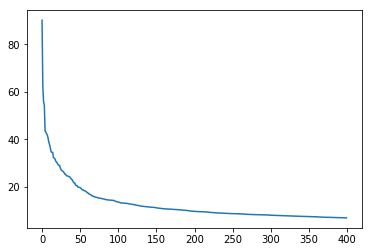

In [8]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:400],df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:400])

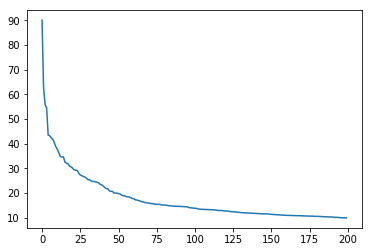

In [9]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200],df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:200])

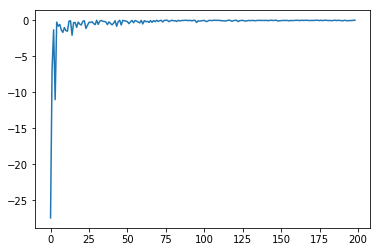

In [10]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200-1],np.diff(df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:200]))

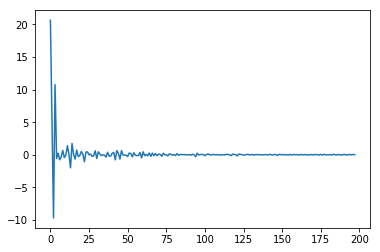

In [11]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200-2],np.diff(np.diff(df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:200])))

8 8


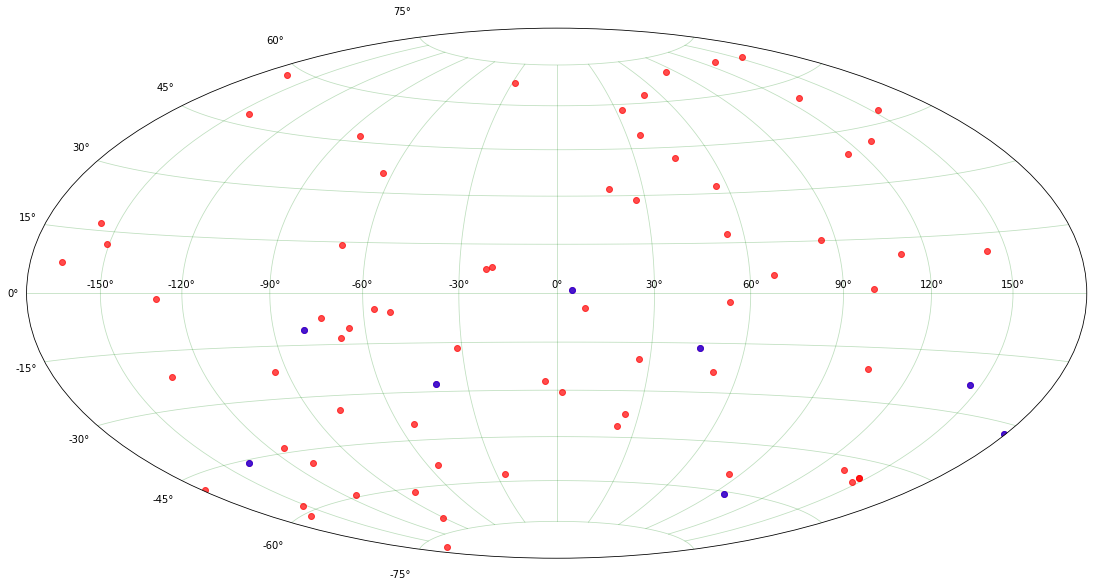

8 8


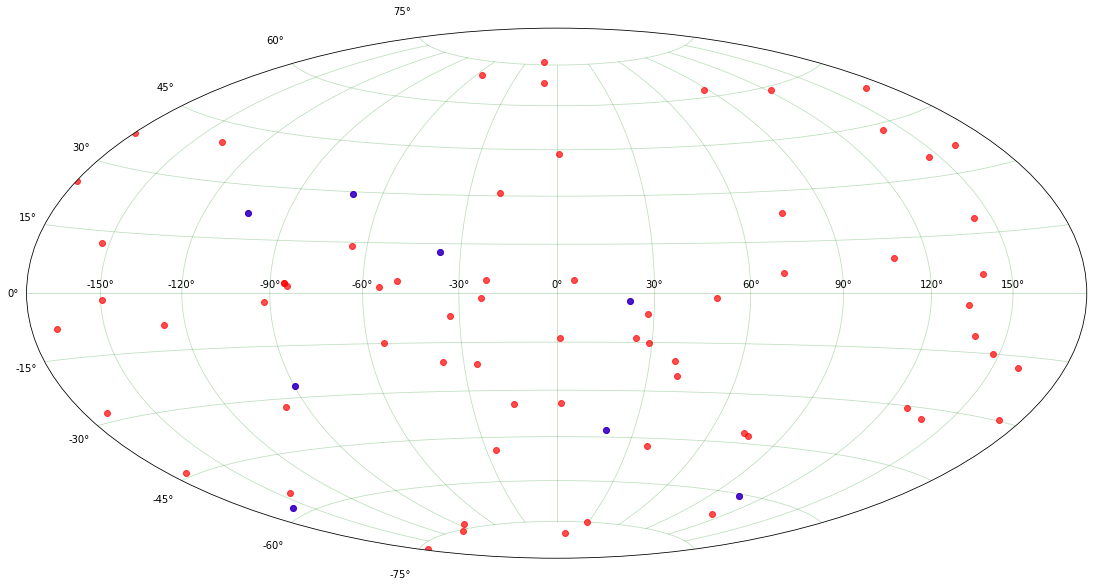

8 8


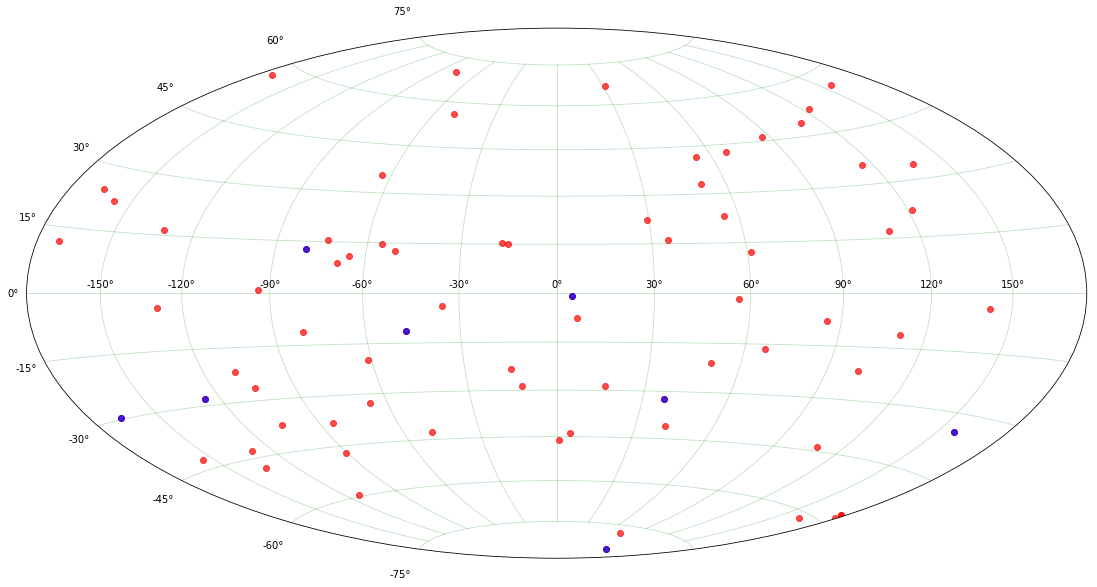

CPU times: user 1.88 s, sys: 16 ms, total: 1.89 s
Wall time: 1.9 s


In [12]:
%%time

def scattermy(df0,x,y,c,k='ro'):
    import matplotlib as mpl
    plt.figure(figsize=(19,11))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('w')
    plt.plot(
        (df0[x]-180)*np.pi/180,
        (df0[y]-90)*np.pi/180, 
        k, 
        alpha=.7
    )
    x1 = df0[df0[c]<0][x]
    y1 = df0[df0[c]<0][y]
    print(len(x1),len(y1))
    if (len(x1) and len(y1)):
        plt.plot(
            (x1-180)*np.pi/180,
            (y1-90)*np.pi/180, 
            'bo', 
            alpha=.7
        )
    

    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    plt.grid(color='g',alpha = .25)#, linestyle='--', linewidth=1.9)
    plt.show()

#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ra','dec','parallax_difference_abs')
scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ra','dec','parallax_difference')

#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'l','b','parallax_difference_abs')
scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'l','b','parallax_difference')

#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ecl_lon','ecl_lat','parallax_difference_abs')
scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ecl_lon','ecl_lat','parallax_difference')


In [13]:
FACT = lambda N: 1 if ( N <= 1) else N*FACT(N-1) 

#np.float64(3.1415926535897932384626433832795),np.float128(np.pi)


from decimal import *
getcontext().prec = 20
PI = Decimal('3.1415926535897932384626433832795')




def FACT2(N1,N2):
# ! Произведение чисел от N1 до N2 
# INTEGER(4), INTENT(IN) :: N1,N2
# INTEGER(4) ::  I
    
    fact2 = 1
    for i in np.arange(N1, N2+1):
        fact2 = fact2*i
    return fact2 

In [14]:
def A(M,N,K):
    Up = 1.
    for i in np.arange(0,2*M):
        Up = Up * (N - K - i)
    
    Dn = 1.
    for i in np.arange(1,M+1):
        Dn = Dn * 2 * i * (2 * (N - i) + 1)
    #tosha^.^
    if (M % 2 == 0):
        return Up/Dn
    else:
        return -Up/Dn
    

def NORM(N,K):
    Up = 1.
    for i in np.arange(N+1,2*N+1):
        Up = Up * i
    Dn = 1.
    for i in np.arange(1, N-K+1):
        Dn = Dn * i
    
    Up = Up / Dn
    
    for i in np.arange(1, N+1):
        Up = Up * 0.5
    return Up

    
def PL(N,K,D):
#Присоединенный полином Лежанжра P_nk
#N,K  - Индексы полинома
#D    - Склонение или галактическая широта в градусах!'''
    if (N<K): return .0 
    
    D = D
#    X = np.sin(D)
#заменили - для случа, когда у нас D изменяется от 0 до pi, на этот отрезке sin(D), эевивалентно -cos(D)
    X = - np.cos(D)
    F = (N - K) / 2
    
    if (F == 0):
        Z = X **(N-K) * np.sqrt(1-X**2) ** K
    else:
        Z = X ** (N-K)
        for m in np.arange(1,F+1):
            Z = Z + A(m,N,K) * X**(N - K - 2*m)
        Z = Z * np.sqrt(1 - X ** 2) ** K
    return NORM(N,K)*Z


def INDEXJ(N,K,L):
    #Вычисление индекса J=N**2+2*K+L-1
    return N ** 2 + 2 * K + L-1

def INDEXES(J):
#Вычисление индексов N,K,L по индексу J (J=N**2+2*K+L-1)
    N = int(np.sqrt(J))
    K = J - N ** 2
    if (K % 2 == 0):
        L = 1
    else:
        L = 0
    K = (K - L + 1) / 2
    return N,int(K),int(L)

def FK(N,K,L,A,D):
#Ненормированная сферическая функция
    if (K == 0):
        return PL(N, 0, D)
    else:
        if (L == 0):
            return PL(N, K, D) * np.sin(K * A)
        else:
            return PL(N, K, D) * np.cos(K * A)
        
        
def FR(N,K):
#! Норма сферической функции
    fr = np.sqrt((2*N+1)/(4.*np.float64(PI)))
    if (K > 0):
        fr=fr*np.sqrt(2.0/FACT2(N-K+1,N+K))
    return fr
    
    
    
    
def FV(N,K,L,A,D):
# ! Нормированная сферическая функция
#INTEGER, INTENT (IN) :: N,K,L
#REAL(8), INTENT (IN) :: A,D ! В градусах
    return FR(N,K) * FK(N,K,L,A,D)

def FVJ(J,A,D):
# ! Нормированная сферическая функция от одного индекса
# INTEGER, INTENT (IN) :: J
# REAL(8), INTENT (IN) :: A,D ! В градусах
#широта (0 -180) b theta, dec, lat
#долгота (0 - 360) l phi, ra, lon
    N,K,L = INDEXES(J)
    return FV(N,K,L,A,D)

In [15]:
NSIDE = 10
sfet_f_n = 48
nside_a_n = NSIDE**2 * 12


n_array_nside = np.arange(hp.nside2npix(NSIDE))

############################################################
##########           vizualization sf
############################################################

def madj(Z):
    M = sum(Z)/len(Z)
    M
    d0 = .0
    for i in Z:
        d0 += np.power((i - M),2)
    return np.sqrt(d0/len(Z)),M

#madj(X0[0]),madj(X1[0]),madj(X2[0][1:])
#X0[1]/nside_a_n,X1[1]/nside_a_n,X2[1]/nside_a_n,


def mapp(Zmap):
    kmapp_0 = np.zeros(nside_a_n)
    for i in [n_array_nside]:
        lib, lil  = list(hp.pix2ang(NSIDE, i))
        for j in np.arange(sfet_f_n):
            kmapp_0[i] += Zmap[j] * FVJ(j, lil,lib)
    return kmapp_0


def mappj(j):
    nsidesub = 32
    nside_a_n_sub = nsidesub**2*12
    kmapp_0 = np.zeros(nside_a_n_sub)
    for i in np.arange(nside_a_n_sub):
        lib, lil  = list(hp.pix2ang(nsidesub, i))
        kmapp_0[i] = FVJ(j, lil,lib)
    return kmapp_0

def mappj_val0(j):
    lib, lil  = list(hp.pix2ang(NSIDE, int(nside_a_n/2)))
    return FVJ(j, lil,lib)

def print_sf(n):
    for j_sf in np.arange(0,n):
        indexsej0,indexsej1,indexsej2 = INDEXES(j_sf)
        titles =  'j='+str(j_sf) + ' (n={}, k={}, l={})'.format(indexsej0,indexsej1,indexsej2)
        mapppj = mappj(j_sf)

        hp.mollview(mapppj,title =titles,unit='',xsize = 800,cmap='seismic')
        
        
#######################################################################
##########              end vizualization sf
#######################################################################


def get_a(arg_l0,arg_b0,cintro_m=False,arg_m = '',arg_y = ''):
    
    ii = lambda b,l: hp.ang2pix(NSIDE,b/180*np.pi,l/180*np.pi)
    
    def get_lb(arg_l = 'l', arg_b = 'b',arg_m=''):
        Nl_ = [[] for i in np.arange(nside_a_n)]
        ll_ = [[] for i in np.arange(nside_a_n)]
        bb_ = [[] for i in np.arange(nside_a_n)]
        mm_ = [[] for i in np.arange(nside_a_n)]
        kl12 = [0 for i in np.arange(nside_a_n)]
        lb12 = [0 for i in np.arange(nside_a_n)]
        
        
        if (arg_m == ''):
            arg_m = arg_l
        for i,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_m]):
            if (arg_m == arg_l):
                m_ = 1
            Nl_[i].append(np.abs(m_))
        for i,rm1,rm2,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b],df_gh_srz[arg_m]):
            if (arg_m == arg_l):
                m_ = 1
            ll_[i].append(rm1)
            bb_[i].append(rm2)
            mm_[i].append(m_)
            
        for i in np.arange(nside_a_n):
            if max(ll_[i]) - min (ll_[i]) > 181:
                ll_[i] = [j if (j<180) else j-360 for j in ll_[i]]
                #print(i,max(ll_[i]),min(ll_[i]), end=' ')
                #klsum_ = np.dot(ll_[i],mm_[i])
                #kl12_ = (klsum_/sum(Nl_[i])/180)*np.pi
                #if (kl12_ < 0):
                #    kl12_ += 2*np.pi
                #print(kl12_*180/np.pi if (kl12_*180/np.pi < 360) else (kl12_*180/np.pi,'FFFFFFFFF'))
        
        for i in np.arange(nside_a_n):
            klsum = np.dot(ll_[i],mm_[i])
            kl12[i] = (klsum/sum(Nl_[i])/180)*np.pi
            if (kl12[i] < 0):
                kl12[i] += 2*np.pi
                
            lbsum = np.dot(bb_[i],mm_[i])
            lb12[i] = (lbsum/sum(Nl_[i])/180)*np.pi
            #print(i,kl12[i],lb12[i])
            
        return kl12, lb12
                
        
    '''     
        Nl_ = np.zeros(nside_a_n)
        ll_ = np.zeros(nside_a_n)
        bb_ = np.zeros(nside_a_n)

        if (arg_m != ''):
            #print('|arg_m != ""',end='')
            for i,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_m]):
                Nl_[i] += np.abs(m_)
            for i,rm1,rm2,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b],df_gh_srz[arg_m]):
                ll_[i] += rm1*m_
                bb_[i] += rm2*m_
        else:
            for i in ii(df_gh_srz[arg_b],df_gh_srz[arg_l]):
                Nl_[i] += 1
            for i,rm1,rm2 in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b]):
                ll_[i] += rm1
                bb_[i] += rm2
        
        #for i,j,kl,kb,kn,ij in zip(ll_ / Nl_,bb_ / Nl_,ll_ ,bb_ , Nl_,[i for i in np.arange(len(Nl_))]):
            #if (np.abs(i) > 180 or np.abs(j) > 180):
                #print('\nlb:',ij,i,j,kl,kb,kn)
        return (ll_ / Nl_ /180)*np.pi, (bb_ / Nl_/180)*np.pi'''
    
    def get_Y(arg_l = 'l', arg_b = 'b', arg_summ = ''):
        Ny_ = np.zeros(nside_a_n)
        Y_ = np.zeros(nside_a_n)

        for i in ii(df_gh_srz[arg_b],df_gh_srz[arg_l]):
            Ny_[i] += 1
        print('\nmin_ns={},\tmax_ns={}\t\t\t\t\t'.format(min(Ny_),max(Ny_)),end='') #nmin_n_in_sector max_n_in_sector
        for i,rm in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_summ]):
            Y_[i] += rm
            
        return Y_ / Ny_

    
    get_dif_l = lambda x,y: min((x-y)%(2*np.pi),-(x-y)%(2*np.pi))
    get_dif_b = lambda x,y: min((x-y)%np.pi,-(x-y)%np.pi)
    
    Am = np.zeros((nside_a_n, sfet_f_n))
    
    if (cintro_m == True):
        print("|cintro_m= True",end='')
        arg_l,arg_b = get_lb(arg_l0,arg_b0,arg_m)
        maxl,maxb=.0,.0
        for i in n_array_nside:
            get_b, get_l  = list(hp.pix2ang(NSIDE, i))
            #print(i, get_l,get_b)
            if ((get_dif_b(get_b,arg_b[i]) > maxb) or (get_dif_l(get_l,arg_l[i]) > maxl)):
                #print(arg_l[i],arg_b[i],round(get_dif_l(get_l,arg_l[i]),2),round(get_dif_b(get_b,arg_b[i]),2))
                maxb,maxl=max(get_dif_b(get_b,arg_b[i]),maxb),max(get_dif_l(get_l, arg_l[i]),maxl)
                print('\r({},{})    \t \t \tmax_dl={},\tmax_db={}'.format(arg_l0[-3:],arg_b0[-3:],round(maxl*180/np.pi,2),round(maxb*180/np.pi,2)),end='')
                #print(get_l,arg_l[i],maxl, get_b,arg_b[i], maxb)
            for j in np.arange(sfet_f_n):
                Am[i][j] = FVJ(j, arg_l[i],arg_b[i])
    else:
        for i in n_array_nside:
            get_b, get_l  = list(hp.pix2ang(NSIDE, i))
            for j in np.arange(sfet_f_n):
                Am[i][j] = FVJ(j, get_l,get_b)
    print('\t| Am creat.', end='')
    
    Y = get_Y(arg_l0, arg_b0, arg_y)
    print('| Y creat.', end='')
    
    return Am, Y

MMM = lambda x: sum(x)/len(x)
DDD = lambda x: np.sqrt(sum([np.power(i-MMM(x),2) for i in x])/len(x))

def statis(Zx):
    print('d={},\tM={},\tD={}'.format(Zx[1][0]/nside_a_n,MMM(Zx[0]),DDD(Zx[0])))
    ink = []
    for k in np.arange(len(Zx[0])):
        if (np.abs(Zx[0][k]- MMM(Zx[0])) - DDD(Zx[0]) > 0):
            ink.append(k)
            print('j =',k,round(Zx[0][k],3),sep='\t')
    return Zx[1][0]/nside_a_n,MMM(Zx[0]),DDD(Zx[0]),ink

def get_healpix_sf(X_,Y_,k_):
    ert = np.zeros(sfet_f_n)
    for i in k_:
        ert[i]=X_[0][i]

    #hp.mollview(mapp(X_[0]),title = 'sf',unit='opromin op',xsize = 1200,cmap='jet')
    hp.mollview(np.array(Y_),title = 'Y',unit='opromin op',xsize = 1200,cmap='jet')
    hp.mollview(mapp(ert),title = 'sf {}'.format(k_),unit='opromin op',xsize = 1200,cmap='jet')
    #hp.mollview(np.array(Y2)-mapp(X2[0]),title = 'Y- sf',unit='opromin op',xsize = 1200, cmap='jet')
    
    #plt.figure(figsize=(16,9))
    #xx = [ i for i in np.arange(sfet_f_n)]
    #markerline, stemlines, baseline = plt.stem(xx, X_[0], '--')
    #plt.setp(baseline, 'color', 'k', 'linewidth', 2)
    #plt.show()

    
def get_sf_gr(cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0 = 'parallax_difference_abs' ):
    print('\ncintro_m="{}", arg_m="{}", arg_y="{}"'.format(cintro_m0,arg_m0,arg_y0))
    print('(ra,dec): ', end='')
    Am0 ,Y0= get_a('ra','dec',cintro_m0,arg_m0,arg_y0)
    X0 = np.linalg.lstsq(Am0,Y0)
    print('\tget_sf_gr: done')
    
    print('(l,b):    ', end='')
    Am1 ,Y1= get_a('l','b',cintro_m0,arg_m0,arg_y0)
    X1 = np.linalg.lstsq(Am1,Y1)
    print('\tget_sf_gr: done')
    
    print('(lon,lat): ', end='')
    Am2 ,Y2= get_a('ecl_lon','ecl_lat',cintro_m0,arg_m0,arg_y0)
    X2 = np.linalg.lstsq(Am2,Y2)
    print('\tget_sf_gr: done')
    
    d0,M0,D0,k0 = statis(X0)
    d1,M1,D1,k1 = statis(X1)
    d2,M2,D2,k2 = statis(X2)
    
    plt.figure(figsize=(20,9))
    colors = ['blue','green','red']
    labels = ['ra,dec','l,b','lon,lat']
    xx = [ i for i in np.arange(sfet_f_n)]
    plt.hist([xx,xx,xx], sfet_f_n, weights = [X0[0],X1[0],X2[0]],histtype='bar', color=colors, label=labels)
    plt.legend(prop={'size': 10})
    plt.grid()
    
    if (len(k0)>1):
        print('get_healpix:k={}, (ra,dec)'.format(len(k0)))
        get_healpix_sf(X0,Y0,k0)
    if (len(k1)>1):
        print('get_healpix:k={}, (l,b)'.format(len(k1)))
        get_healpix_sf(X1,Y1,k1)
    if (len(k2)>1):
        print('get_healpix:k={}, (ecl_lon,ecl_lat)'.format(len(k2)))
        get_healpix_sf(X2,Y2,k2)


cintro_m="False", arg_m="", arg_y="parallax_difference_abs"
(ra,dec): 	| Am creat.
min_ns=31.0,	max_ns=170.0					| Y creat.	get_sf_gr: done
(l,b):    	| Am creat.
min_ns=31.0,	max_ns=174.0					| Y creat.	get_sf_gr: done
(lon,lat): 	| Am creat.
min_ns=35.0,	max_ns=169.0					| Y creat.	get_sf_gr: done
d=0.030267577001673717,	M=0.06686523481381886,	D=0.5597360972304644
j =	0	3.856
d=0.0309958879868754,	M=0.0925444370105535,	D=0.5563315274124153
j =	0	3.858
d=0.0302167025188925,	M=0.06699627721376777,	D=0.5599041544402367
j =	0	3.857
j =	4	-0.554
get_healpix:k=2, (ecl_lon,ecl_lat)

cintro_m="True", arg_m="", arg_y="parallax_difference_abs"
(ra,dec)    	 	 	max_dl=3.33,	max_db=0.77	| Am creat.
min_ns=31.0,	max_ns=170.0					| Y creat.	get_sf_gr: done
(l,b)    	 	 	max_dl=3.77,	max_db=0.68	| Am creat.
min_ns=31.0,	max_ns=174.0					| Y creat.	get_sf_gr: done
(lon,lat)    	 	 	max_dl=2.83,	max_db=0.66	| Am creat.
min_ns=35.0,	max_ns=169.0					| Y creat.	get_sf_gr: done
d=0.03029882414291201,	M

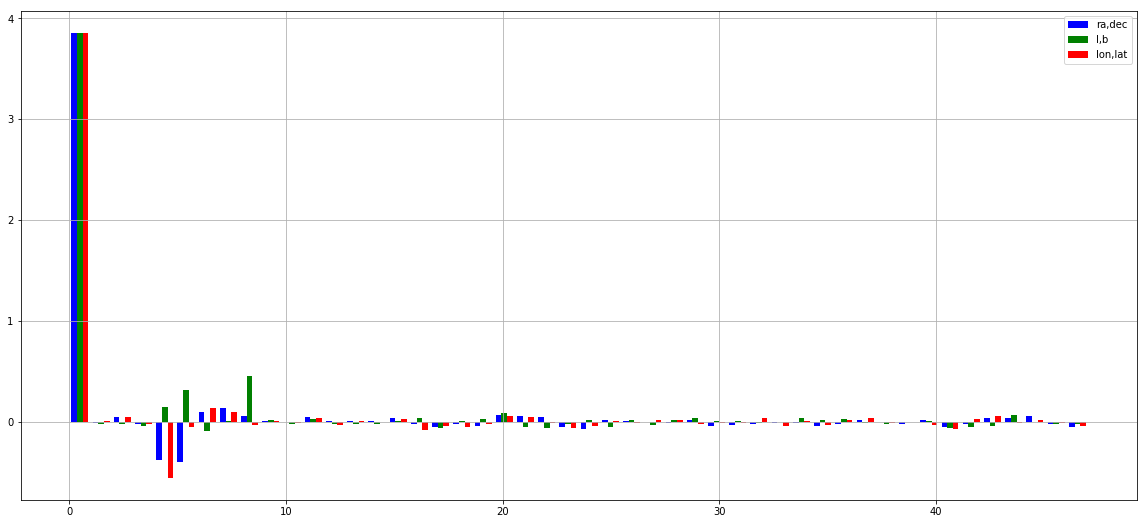

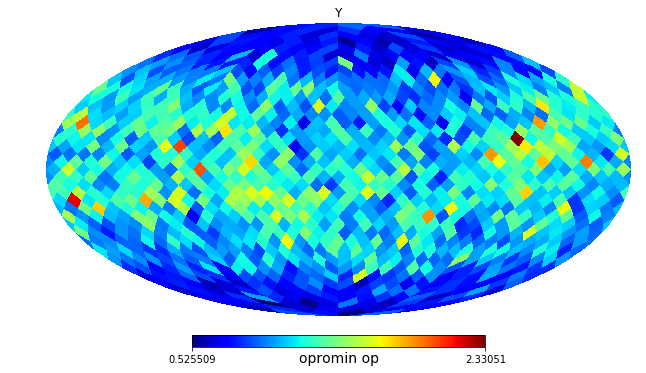

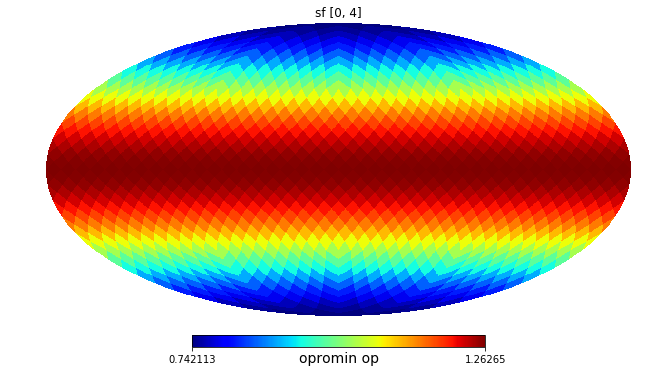

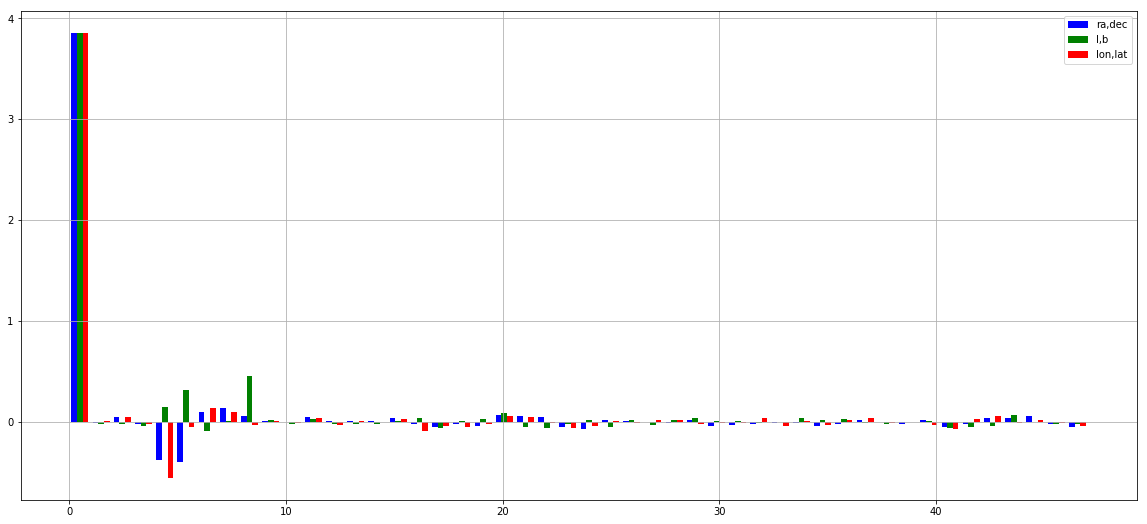

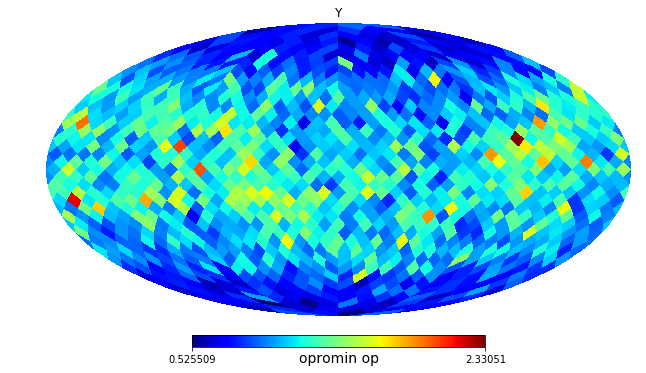

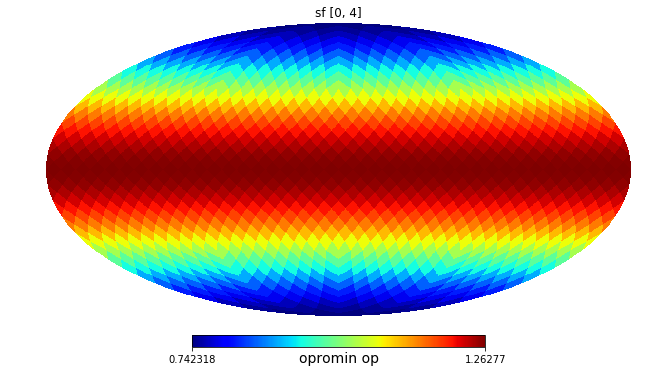

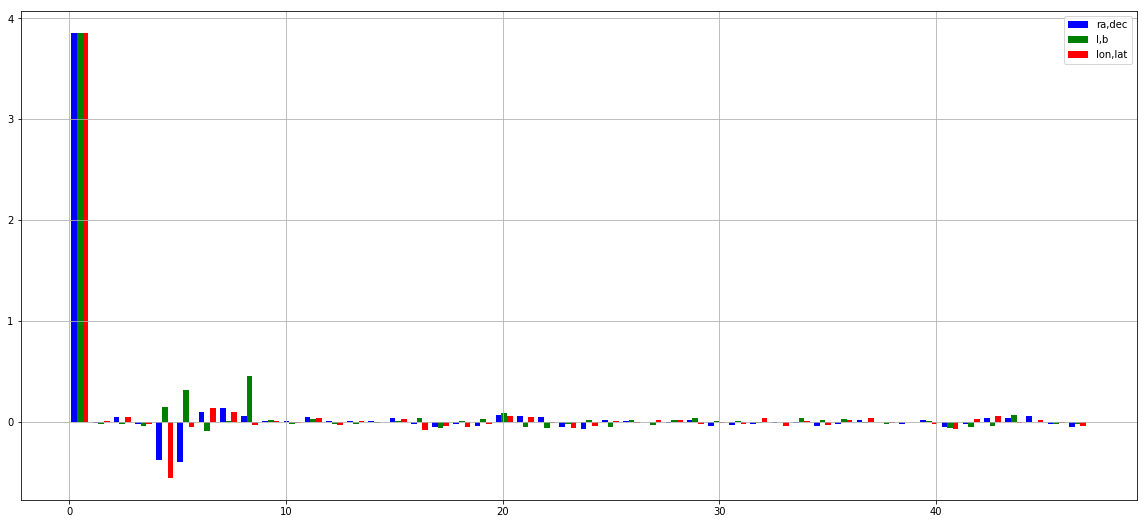

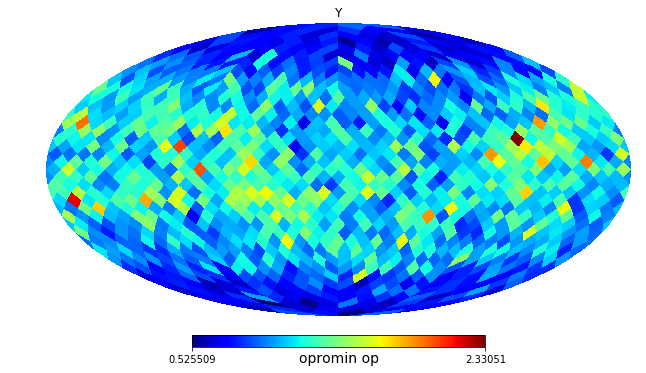

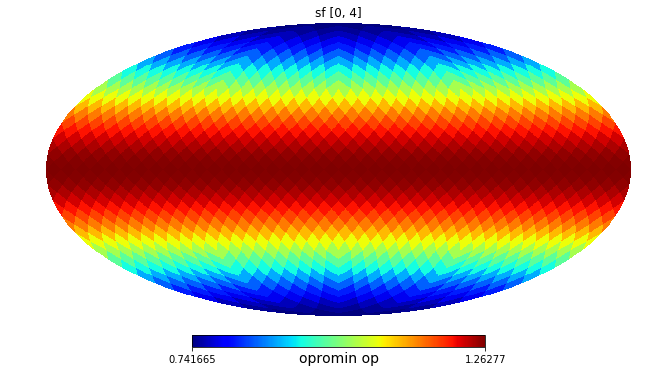

In [16]:
%%time
get_sf_gr(cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
get_sf_gr(cintro_m0=True,arg_m0='',arg_y0='parallax_difference_abs')
get_sf_gr(cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')


cintro_m="False", arg_m="", arg_y="parallax_error_hip_tgas"
(ra,dec): 	| Am creat.
min_ns=31.0,	max_ns=170.0					| Y creat.	get_sf_gr: done
(l,b):    	| Am creat.
min_ns=31.0,	max_ns=174.0					| Y creat.	get_sf_gr: done
(lon,lat): 	| Am creat.
min_ns=35.0,	max_ns=169.0					| Y creat.	get_sf_gr: done
d=0.01575875997085836,	M=0.07080396380576708,	D=0.5891256663485763
j =	0	4.057
d=0.01619002626830139,	M=0.10068544469647582,	D=0.5849086439439513
j =	0	4.058
d=0.014994268348650633,	M=0.0704278578429335,	D=0.589052884863862
j =	0	4.055
j =	4	-0.578
get_healpix:k=2, (ecl_lon,ecl_lat)

cintro_m="True", arg_m="", arg_y="parallax_error_hip_tgas"
(ra,dec)    	 	 	max_dl=3.33,	max_db=0.77	| Am creat.
min_ns=31.0,	max_ns=170.0					| Y creat.	get_sf_gr: done
(l,b)    	 	 	max_dl=3.77,	max_db=0.68	| Am creat.
min_ns=31.0,	max_ns=174.0					| Y creat.	get_sf_gr: done
(lon,lat)    	 	 	max_dl=2.83,	max_db=0.66	| Am creat.
min_ns=35.0,	max_ns=169.0					| Y creat.	get_sf_gr: done
d=0.015764533988230956,

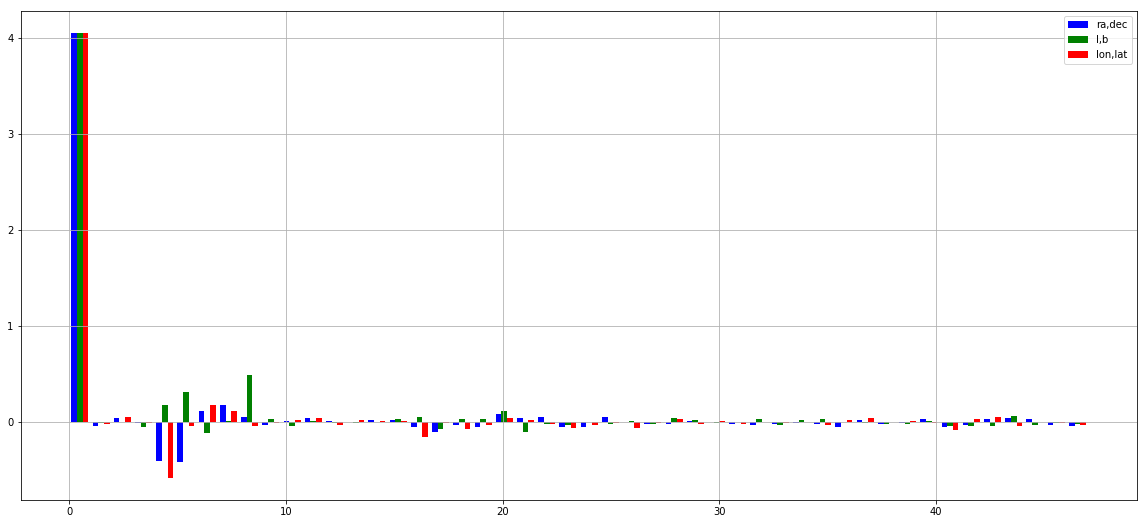

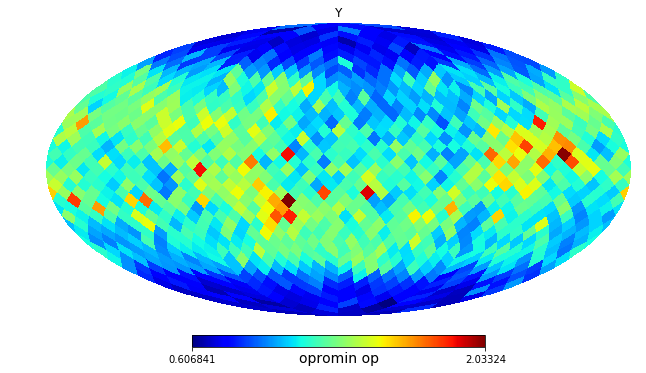

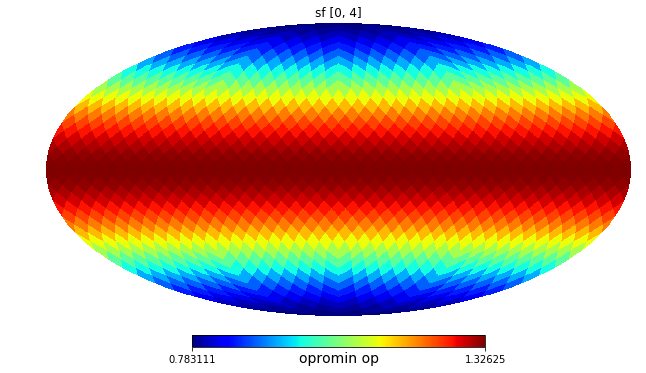

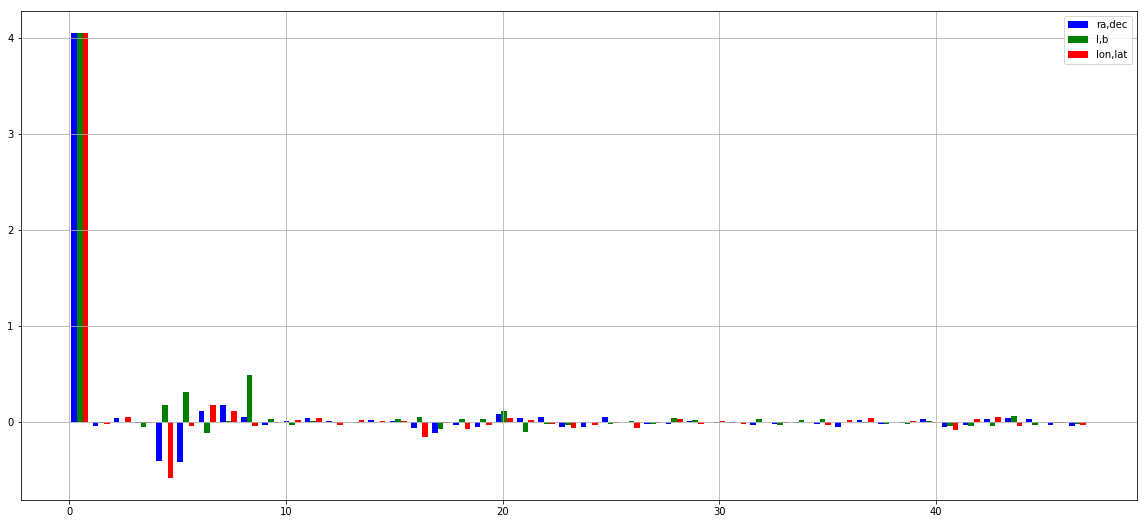

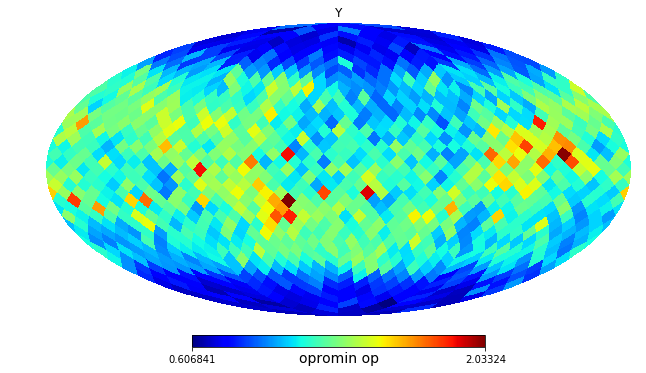

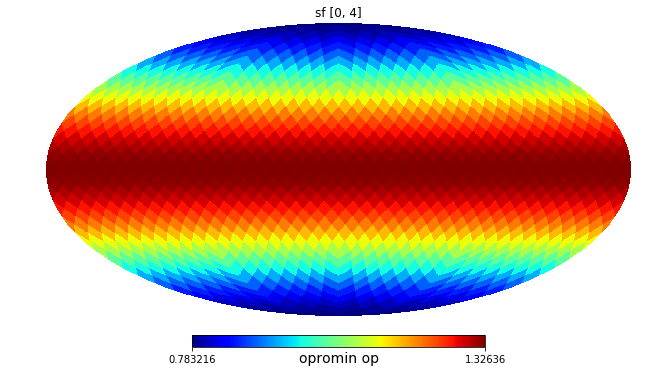

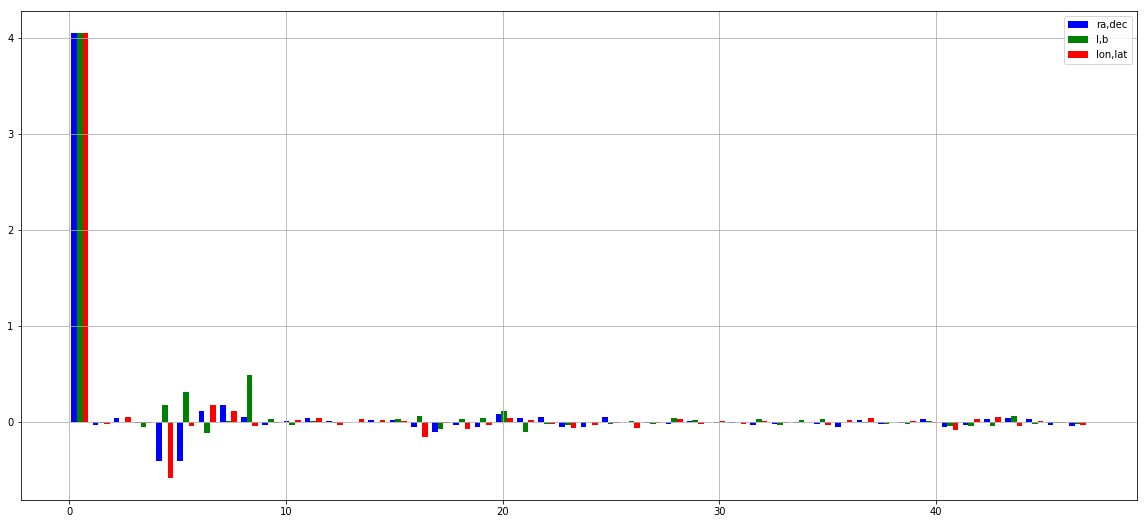

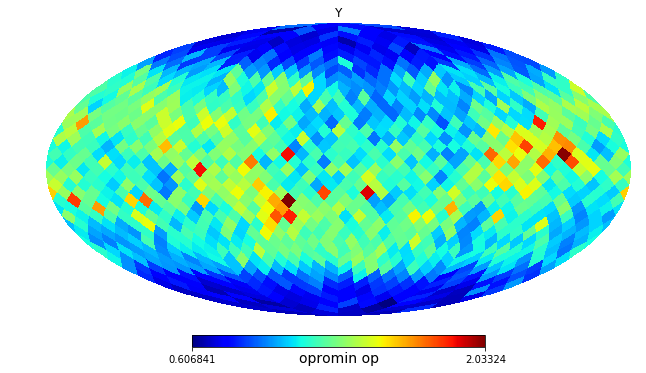

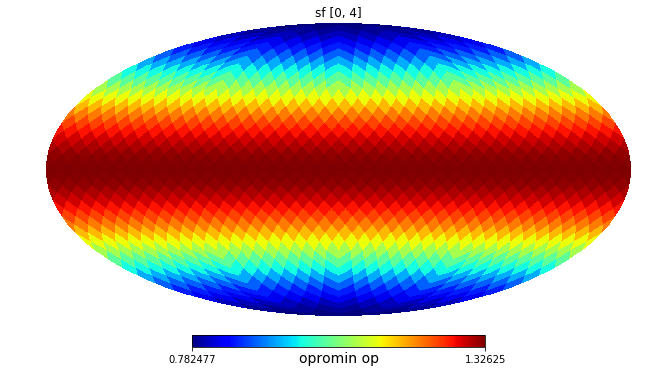

In [17]:
%%time
get_sf_gr(cintro_m0=False,arg_m0='',arg_y0='parallax_error_hip_tgas')
get_sf_gr(cintro_m0=True,arg_m0='',arg_y0='parallax_error_hip_tgas')
get_sf_gr(cintro_m0=True,arg_m0='parallax_error_hip_tgas',arg_y0='parallax_error_hip_tgas')



cintro_m="False", arg_m="", arg_y="parallax_difference"
(ra,dec): 	| Am creat.
min_ns=31.0,	max_ns=170.0					| Y creat.	get_sf_gr: done
(l,b):    	| Am creat.
min_ns=31.0,	max_ns=174.0					| Y creat.	get_sf_gr: done
(lon,lat): 	| Am creat.
min_ns=35.0,	max_ns=169.0					| Y creat.	get_sf_gr: done
d=0.06901801036041387,	M=0.009299446640337569,	D=0.11933983255999464
j =	0	0.74
j =	2	0.173
j =	8	-0.128
d=0.07078651964356918,	M=0.008171731559904846,	D=0.12025121512675026
j =	0	0.742
j =	3	-0.133
j =	4	-0.132
j =	25	-0.139
d=0.06529354320804522,	M=0.01390474422202624,	D=0.1190576970557127
j =	0	0.742
j =	2	0.141
j =	8	-0.129
j =	33	-0.106
get_healpix:k=3, (ra,dec)
get_healpix:k=4, (l,b)
get_healpix:k=4, (ecl_lon,ecl_lat)

cintro_m="True", arg_m="", arg_y="parallax_difference"
(ra,dec)    	 	 	max_dl=3.33,	max_db=0.77	| Am creat.
min_ns=31.0,	max_ns=170.0					| Y creat.	get_sf_gr: done
(l,b)    	 	 	max_dl=3.77,	max_db=0.68	| Am creat.
min_ns=31.0,	max_ns=174.0					| Y creat.	get_sf_gr: done

/home/p_a/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


CPU times: user 1min 4s, sys: 4.19 s, total: 1min 8s
Wall time: 1min 2s


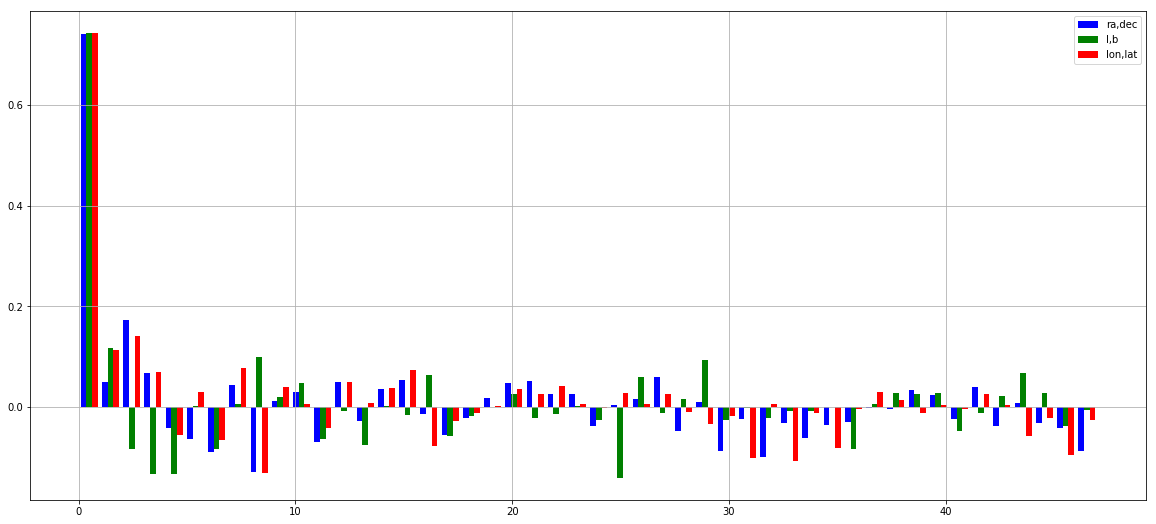

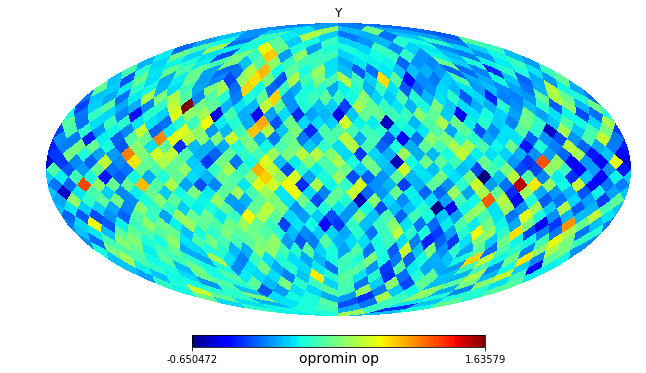

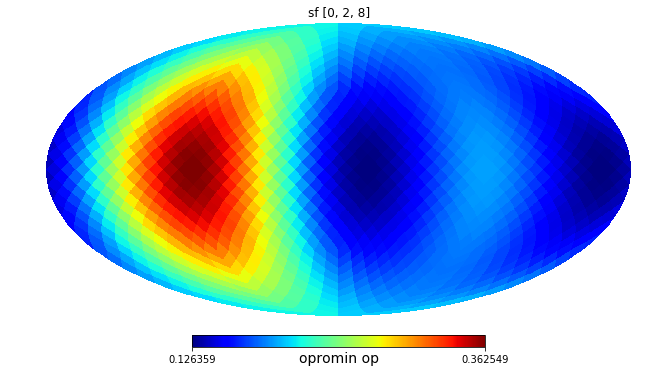

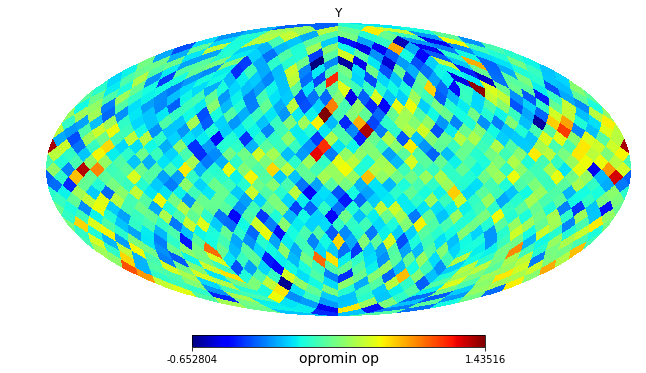

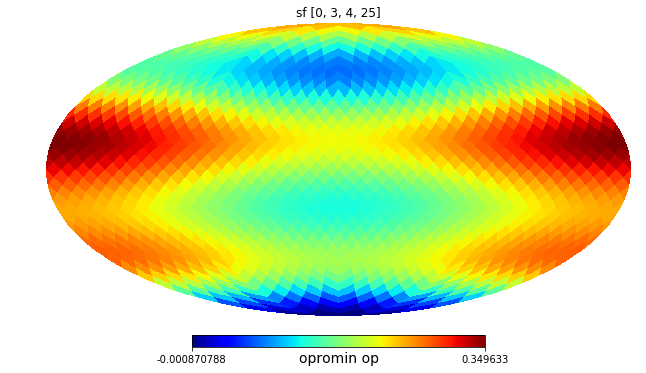

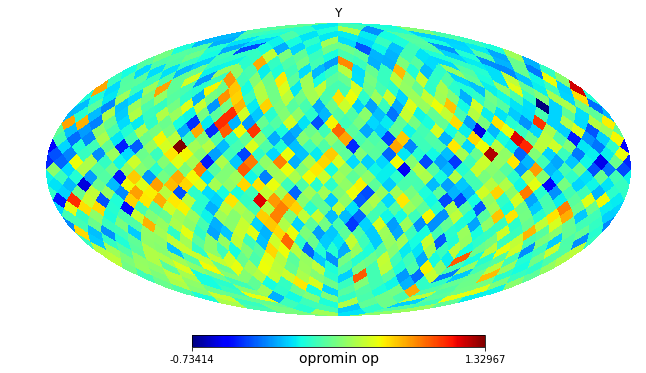

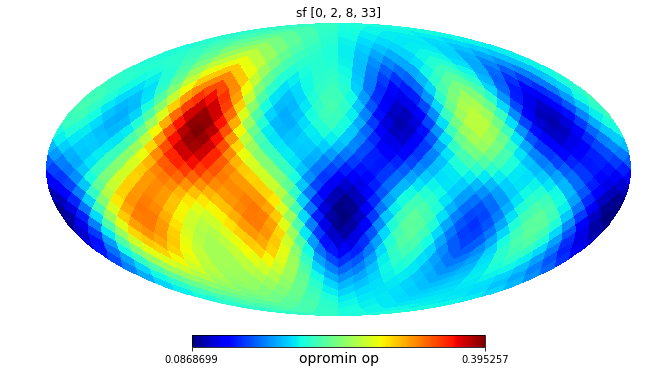

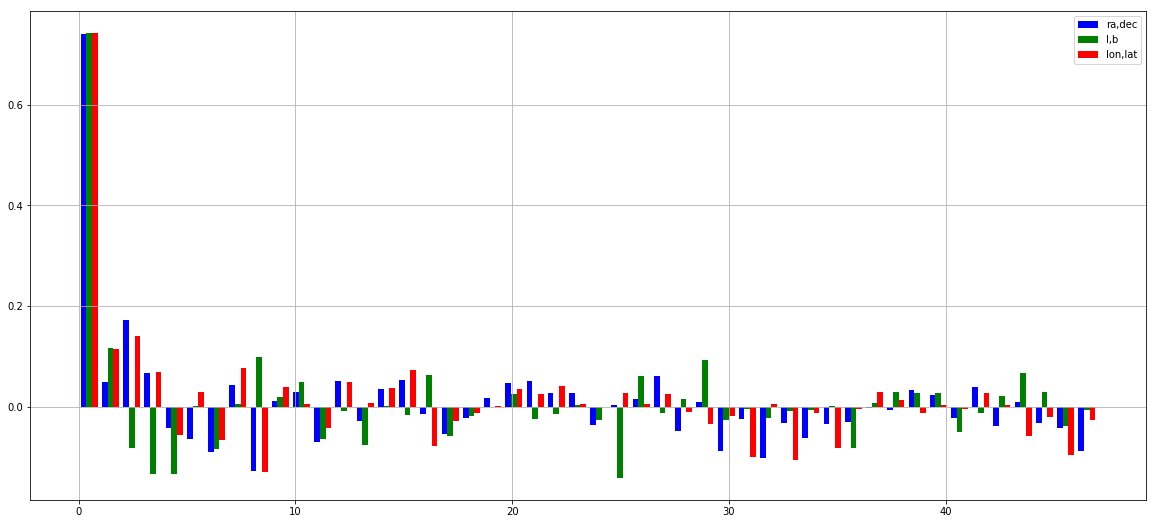

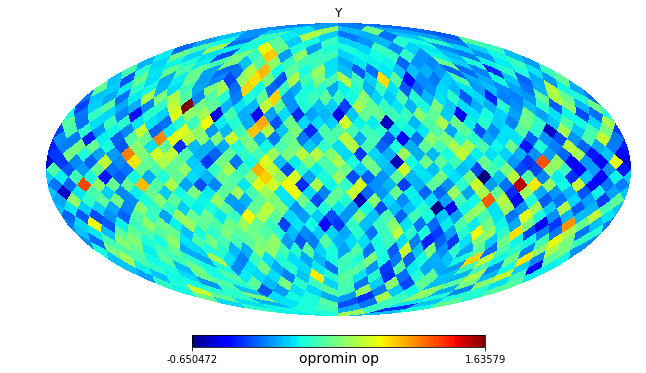

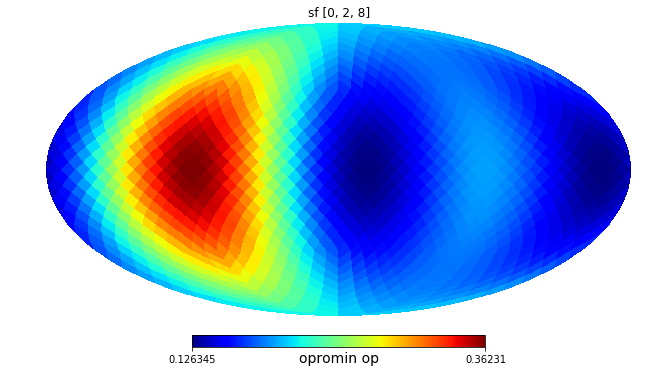

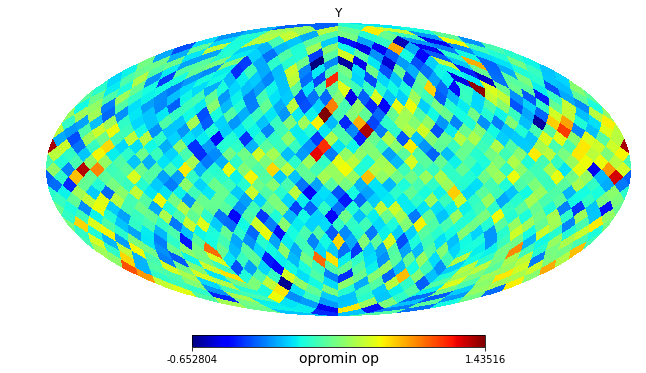

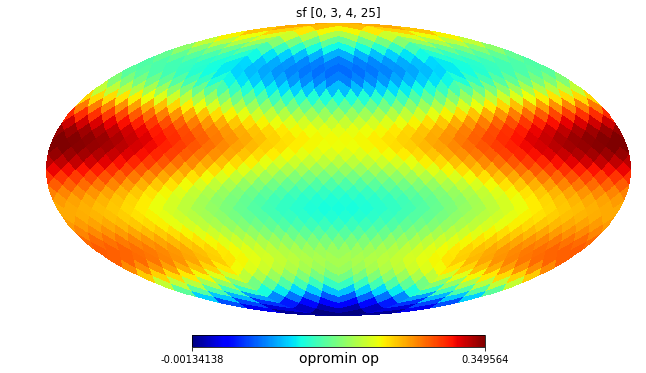

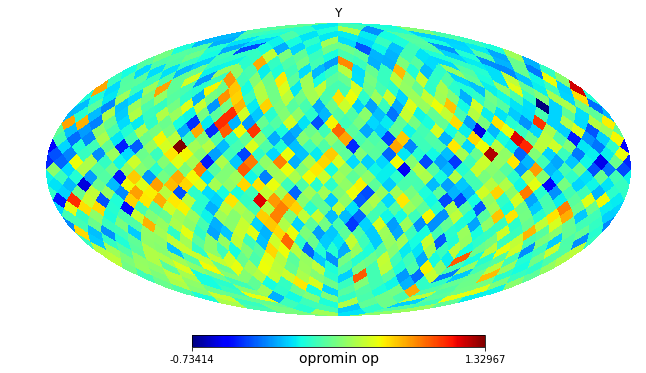

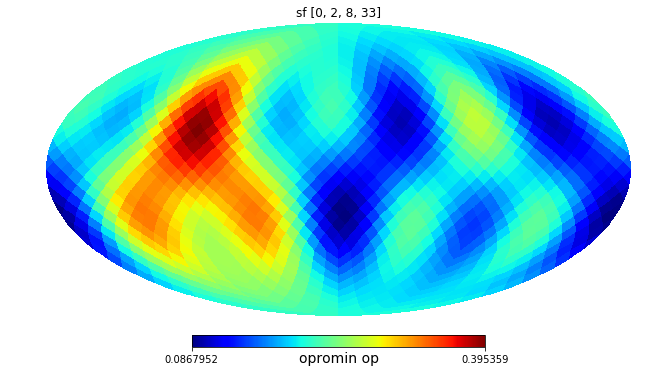

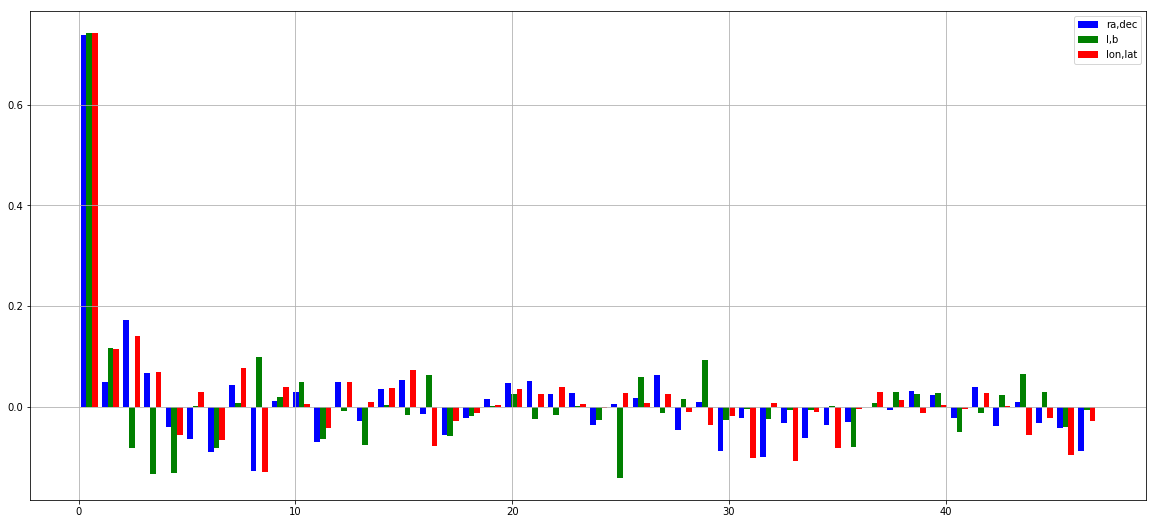

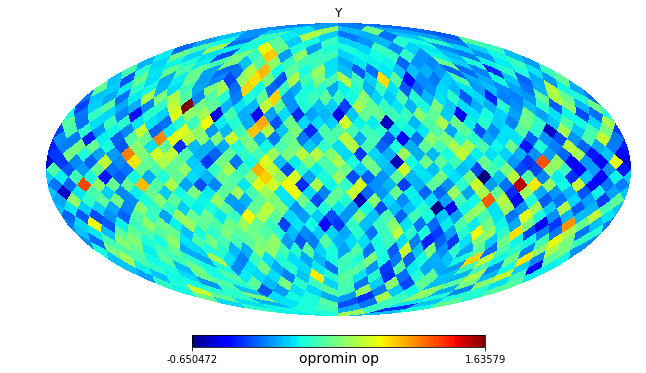

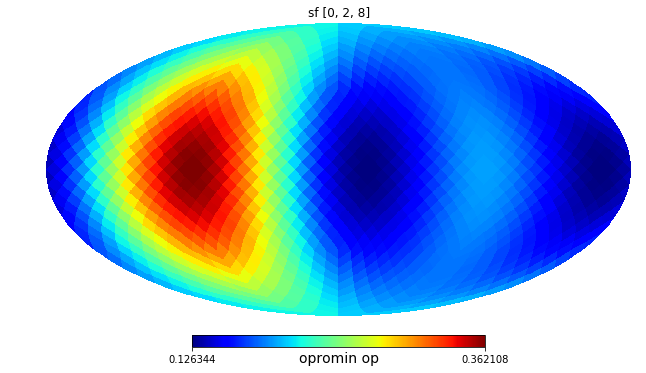

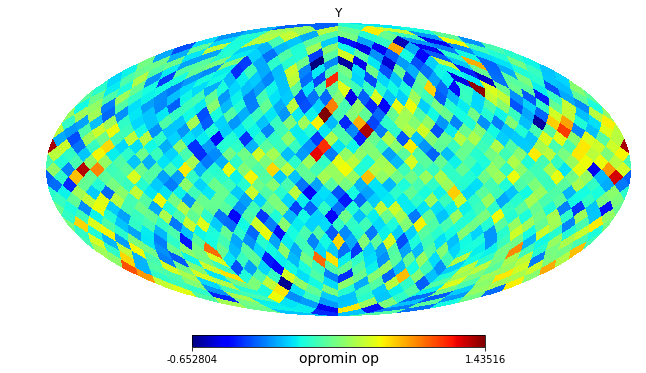

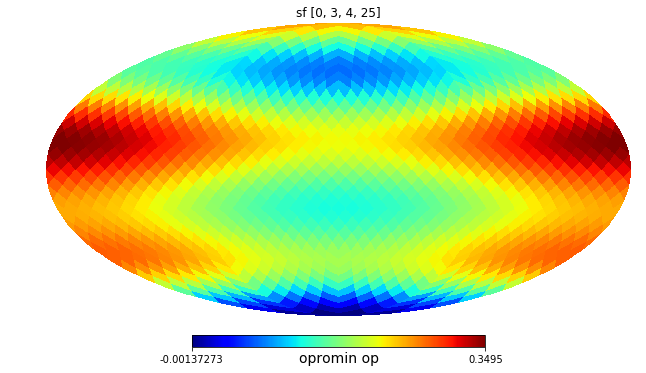

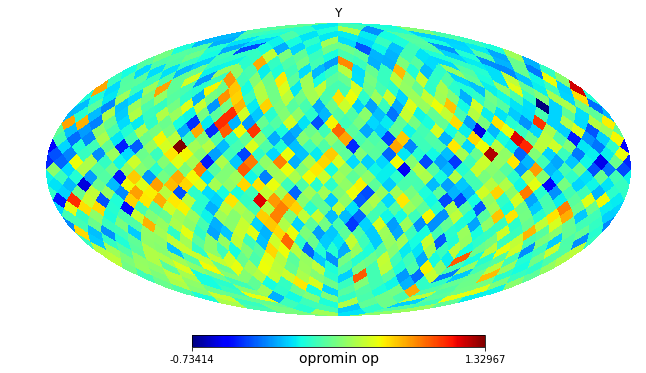

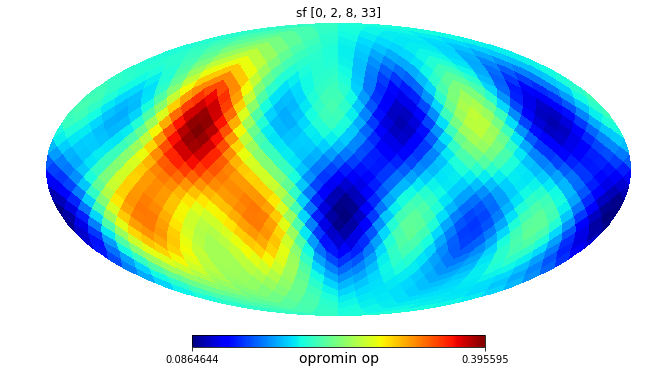

In [18]:
%%time

get_sf_gr(cintro_m0=False,arg_m0='',arg_y0='parallax_difference')
get_sf_gr(cintro_m0=True,arg_m0='',arg_y0='parallax_difference')
get_sf_gr(cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference')


In [19]:
def test_cmap():
    NSIDE = 10

    m = np.arange(hp.nside2npix(NSIDE))
    #hp.mollview(m)#, nest=True, title="Mollview image NESTED")


    for j_sf in np.arange(13,14):
        indexsej0,indexsej1,indexsej2 = INDEXES(j_sf)
        titles =  'j='+str(j_sf) + ' (n={}, k={}, l={})'.format(indexsej0,indexsej1,indexsej2)
        mapppj = mappj(j_sf)

        hp.mollview(mapppj,title =titles,unit='',xsize = 400)
        cmap = cm.jet
        cmap.set_over(cmap(1.0))
        cmap.set_under('w')
        cmap.set_bad('gray')
        hp.mollview(mapppj,title =titles,unit='',xsize = 400,cmap='jet')
        cmap = cm.bwr
        cmap.set_over(cmap(1.0))
        cmap.set_under('w')
        cmap.set_bad('gray')
        hp.mollview(mapppj,title =titles,unit='',xsize = 400,cmap='bwr')

        cmap = cm.seismic
        cmap.set_over(cmap(1.0))
        cmap.set_under('w')
        cmap.set_bad('gray')
        hp.mollview(mapppj,title =titles,unit='',xsize = 400,cmap='seismic')


In [20]:

'''
# Get the data
from astropy.io import fits
hdulist = fits.open('https://lambda.gsfc.nasa.gov/data/map/dr3/skymaps/5yr//wmap_band_imap_r9_5yr_K_v3.fits')
# Set up the HEALPix projection
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic
nside = hdulist[1].header['NSIDE']
order = hdulist[1].header['ORDERING']
hp = HEALPix(nside=nside, order=order, frame=Galactic())

# Sample a 300x200 grid in RA/Dec
from astropy import units as u
ra = np.linspace(-180., 180., 3000) * u.deg
dec = np.linspace(-90., 90., 2000) * u.deg
ra_grid, dec_grid = np.meshgrid(ra, dec)

# Set up Astropy coordinate objects
from astropy.coordinates import SkyCoord
coords = SkyCoord(ra_grid.ravel(), dec_grid.ravel(), frame='icrs')

# Interpolate values
temperature = hdulist[1].data['temperature']
tmap = hp.interpolate_bilinear_skycoord(coords, temperature)
tmap = tmap.reshape((20000, 30000))

# Make a plot of the interpolated temperatures
plt.figure(figsize=(9, 5))
ax = plt.subplot(111, projection = 'hammer')
im = ax.imshow(tmap, extent=[-180, 180, -90, 90], cmap=plt.cm.RdYlBu, aspect='auto')
plt.colorbar(im)
plt.xlabel('Right ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.show()'''

"\n# Get the data\nfrom astropy.io import fits\nhdulist = fits.open('https://lambda.gsfc.nasa.gov/data/map/dr3/skymaps/5yr//wmap_band_imap_r9_5yr_K_v3.fits')\n# Set up the HEALPix projection\nfrom astropy_healpix import HEALPix\nfrom astropy.coordinates import Galactic\nnside = hdulist[1].header['NSIDE']\norder = hdulist[1].header['ORDERING']\nhp = HEALPix(nside=nside, order=order, frame=Galactic())\n\n# Sample a 300x200 grid in RA/Dec\nfrom astropy import units as u\nra = np.linspace(-180., 180., 3000) * u.deg\ndec = np.linspace(-90., 90., 2000) * u.deg\nra_grid, dec_grid = np.meshgrid(ra, dec)\n\n# Set up Astropy coordinate objects\nfrom astropy.coordinates import SkyCoord\ncoords = SkyCoord(ra_grid.ravel(), dec_grid.ravel(), frame='icrs')\n\n# Interpolate values\ntemperature = hdulist[1].data['temperature']\ntmap = hp.interpolate_bilinear_skycoord(coords, temperature)\ntmap = tmap.reshape((20000, 30000))\n\n# Make a plot of the interpolated temperatures\nplt.figure(figsize=(9, 5))\n

In [21]:
def get_proj():
    # Author: Jake VanderPlas
    # License: BSD
    #   The figure produced by this code is published in the textbook
    #   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
    #   For more information, see http://astroML.github.com
    #   To report a bug or issue, use the following forum:
    #    https://groups.google.com/forum/#!forum/astroml-general
    import numpy as np
    from matplotlib import pyplot as plt
    from astroML.plotting import plot_tissot_ellipse

    #----------------------------------------------------------------------
    # This function adjusts matplotlib settings for a uniform feel in the textbook.
    # Note that with usetex=True, fonts are rendered with LaTeX.  This may
    # result in an error if LaTeX is not installed on your system.  In that case,
    # you can set usetex to False.
    from astroML.plotting import setup_text_plots
    setup_text_plots(fontsize=8, usetex=True)

    #------------------------------------------------------------
    # generate a latitude/longitude grid
    circ_long = np.linspace(-np.pi, np.pi, 13)[1:-1]
    circ_lat = np.linspace(-np.pi / 2, np.pi / 2, 7)[1:-1]
    radius = 10 * np.pi / 180.

    #------------------------------------------------------------
    # Plot the built-in projections
    plt.figure(figsize=(5, 4))
    plt.subplots_adjust(hspace=0, wspace=0.12,
                        left=0.08, right=0.95,
                        bottom=0.05, top=1.0)

    for (i, projection) in enumerate(['Hammer', 'Aitoff', 'Mollweide', 'Lambert']):
        ax = plt.subplot(221 + i, projection=projection.lower())

        ax.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3
                                                    * np.linspace(-2, 2, 5)))
        ax.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6
                                                    * np.linspace(-5, 5, 11)))
        ax.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6
                                                    * np.linspace(-2, 2, 5)))
        ax.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12
                                                    * np.linspace(-5, 5, 11)))

        ax.grid(True, which='minor')

        plot_tissot_ellipse(circ_long[:, None], circ_lat, radius,
                            ax=ax, fc='k', alpha=0.3, linewidth=0)
        ax.set_title('%s projection' % projection)
        #plot_tissot_sqrt()
    plt.show()